In [10]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
%matplotlib inline

In [11]:
# Read the df
df = pd.read_csv('df_to_model.csv')

# Splite the independent variables and the dependent variables 

In [12]:
# Our target variable is 'Response', since it tells us whether the customer is going to purchase the gadget.
y = df['Response']
X = df.drop('Response', axis=1)

# We split the training data with the test data

In [13]:
# Use 75% for training and 25% for testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 

# Now we train our Logistic Regression model

In [19]:
logreg = LogisticRegression(max_iter=3000, class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [20]:
print(f'Test_score: {logreg.score(X_test, y_test)}')
print(f'Train_score: {logreg.score(X_train, y_train)}')

Test_score: 0.775
Train_score: 0.7559523809523809


In [21]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[368,  94],
       [ 32,  66]], dtype=int64)

Text(0.5, 257.44, 'Etiqueta de prediccion')

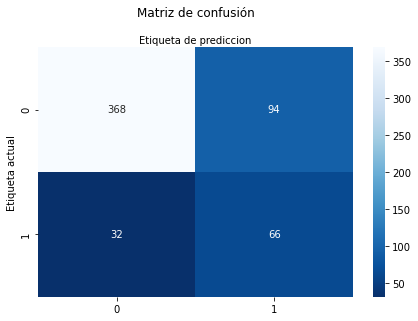

In [22]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap= 'Blues_r', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion')

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85       462
           1       0.41      0.67      0.51        98

    accuracy                           0.78       560
   macro avg       0.67      0.74      0.68       560
weighted avg       0.83      0.78      0.79       560

